# Sailing Club of Washington (SCOW) By The Numbers

September, 2016


We take a quick look at reservation data from 2014-01- to 2016-09 to understand boat reservation patterns. 




In [1]:
# loading necessary packages
import openpyxl
import csv
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline 
import calmap

In [2]:
# loading reservation data
res = pd.DataFrame.from_csv('../data_clean/reg_20160907.csv')

In [3]:
# formating date field
res['date'] = pd.to_datetime(res['date'], format="%Y-%m-%d %H:%M:%S")

## Scow Reservations at a Quick Glance

In [4]:
# get daily scot reservation count
daily = res.groupby(res['date'].apply(lambda x: x.date()))['id'].count()
daily = pd.DataFrame(daily)
daily = daily.reset_index()
daily = daily.sort_values('date')

# reindex to take into account days with no reservation data 
date_index = pd.date_range(daily['date'].min(), daily['date'].max(), freq='D')
daily = daily.set_index('date')
daily = daily.reindex(date_index, fill_value=0)


/home/areias/anaconda/lib/python2.7/site-packages/calmap/__init__.py:294: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  by_day = data.resample('D', how=how)
/home/areias/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'Arial'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


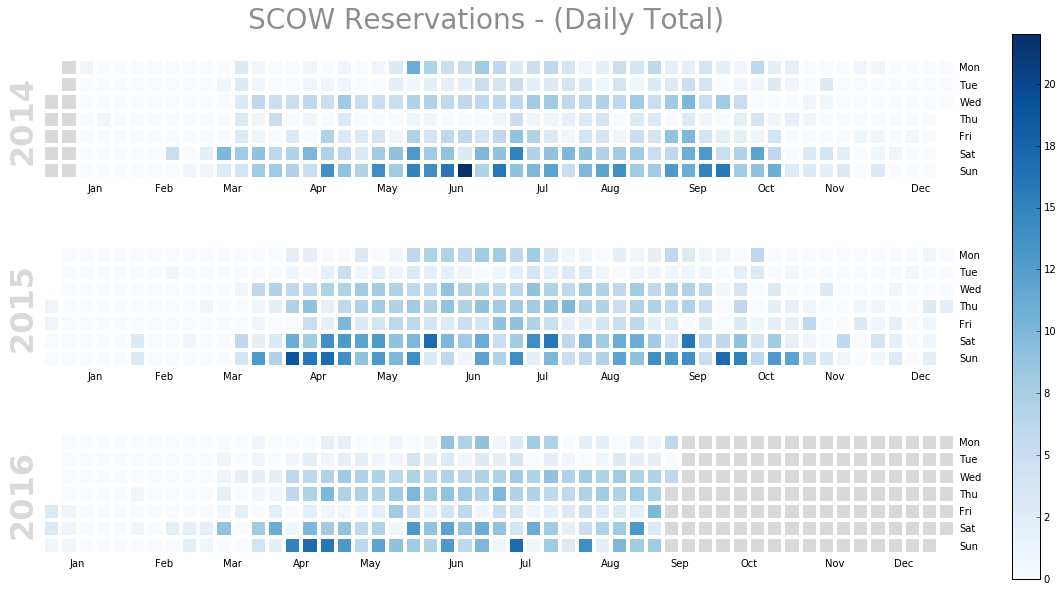

In [5]:
fig,ax=calmap.calendarplot(daily['id'],
                    linewidth=3, fillcolor='#d9d9d9', cmap='Blues',
                    fig_kws=dict(figsize=(17,8)))
plt.suptitle('SCOW Reservations - (Daily Total)', fontsize=28, color='#8d8d8d', x=0.4, y=1.03)
fig.colorbar(ax[0].get_children()[1], ax=ax.ravel().tolist(), format='%.0f')
plt.show()

## Yearly Totals

Comparing yearly reservation totals until August.

      Total Reservations  Y-Y % change
year                                  
2014                 880           NaN
2015                1010     14.772727
2016                 906    -10.297030



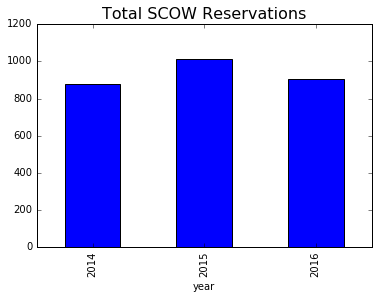

In [6]:
res['year'] = res['date'].apply(lambda x: x.year)
res['month'] = res['date'].apply(lambda x: x.month)

# comparing year to date  
res = res[res['month']<=8]

# total 
df = pd.DataFrame(res.groupby(res['year'])['id'].count())
df.columns = ['Total Reservations']
df['Y-Y % change'] = ((df - df.shift()) / df.shift() )*100
print df
print ""
fig = res.groupby(res['year'])['id'].count().plot(kind='bar')
plt.title('Total SCOW Reservations', fontsize=16)
plt.show()

      Total FS Reservations  Y-Y % change
year                                     
2014                    592           NaN
2015                    732     23.648649
2016                    642    -12.295082



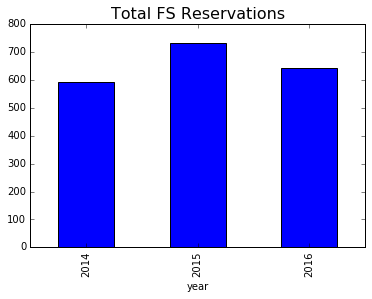

In [7]:
# scots
df = pd.DataFrame(res[res['scot']==1].groupby(res['year'])['id'].count())
df.columns = ['Total FS Reservations']
df['Y-Y % change'] = ((df - df.shift()) / df.shift() )*100
print df
print ""
fig = res[res['scot']==1].groupby(res['year'])['id'].count().plot(kind='bar')
plt.title('Total FS Reservations', fontsize=16)
plt.show()

      Total Cruiser Reservations  Y-Y % change
year                                          
2014                         288           NaN
2015                         278     -3.472222
2016                         264     -5.035971



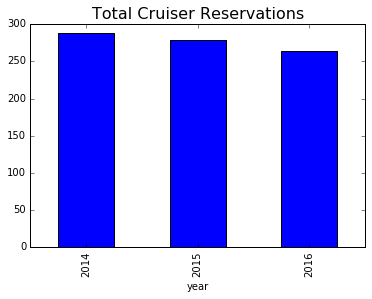

In [8]:
# cruisers
df = pd.DataFrame(res[res['scot']==0].groupby(res['year'])['id'].count())
df.columns = ['Total Cruiser Reservations']
df['Y-Y % change'] = ((df - df.shift()) / df.shift() )*100
print df
print ""
fig = res[res['scot']==0].groupby(res['year'])['id'].count().plot(kind='bar')
plt.title('Total Cruiser Reservations', fontsize=16)
plt.show()

## Reservations by club function

In [9]:
# scots
df = res[res['scot']==1].groupby([res['year'], res['purpose']])['id'].count()
df = pd.DataFrame(df)
df = df.reset_index()
pivoted = df.pivot('year', 'purpose', 'id')

In [10]:
# totals 
pivoted


purpose,club function,maintenance,personal,racing,social,training
year,,,,,,
2014,44,35,228,185,5,95
2015,72,33,207,216,118,86
2016,51,17,159,216,128,71


In [11]:
# yearly pecent change 
pivoted.pct_change().round(2)*100

purpose,club function,maintenance,personal,racing,social,training
year,,,,,,
2014,NaN,NaN,NaN,NaN,NaN,NaN
2015,64.0,-6.0,-9.0,17.0,2260.0,-9.0
2016,-29.0,-48.0,-23.0,0.0,8.0,-17.0


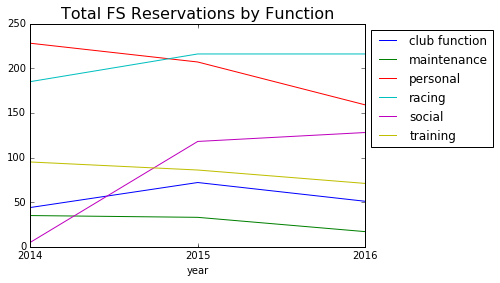

In [12]:
# graph
pivoted.index= pd.to_datetime(pivoted.index, format="%Y")
fig = pivoted.plot()
plt.title('Total FS Reservations by Function', fontsize=16)
plt.legend(ncol=1, bbox_to_anchor=(1.4, 1))
plt.show()

In [13]:
# cruisers
df = res[res['scot']==0].groupby([res['year'], res['purpose']])['id'].count()
df = pd.DataFrame(df)
df = df.reset_index()
pivoted = df.pivot('year', 'purpose', 'id')
pivoted

purpose,club function,maintenance,personal,racing,social,training
year,,,,,,
2014,28,50,138,28,3,41
2015,25,8,191,11,13,30
2016,29,23,156,28,4,24


In [14]:
# yearly pecent change 
pivoted.pct_change().round(2)*100

purpose,club function,maintenance,personal,racing,social,training
year,,,,,,
2014,NaN,NaN,NaN,NaN,NaN,NaN
2015,-11.0,-84.0,38.0,-61.0,333.0,-27.0
2016,16.0,188.0,-18.0,155.0,-69.0,-20.0


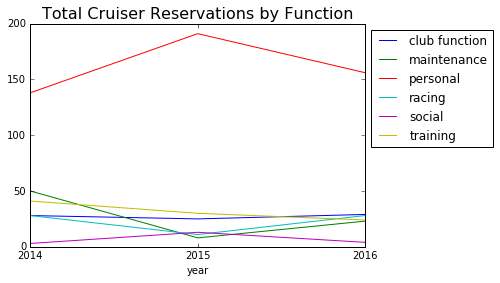

In [15]:
# graph
pivoted.index= pd.to_datetime(pivoted.index, format="%Y")
fig = pivoted.plot()
plt.title('Total Cruiser Reservations by Function', fontsize=16)
plt.legend(ncol=1, bbox_to_anchor=(1.4, 1))
plt.show()

## Seasonal Change in Reservations (Monthly totals)

In [16]:
# reloading reservation data so as to have all months back
res = pd.DataFrame.from_csv('../data_clean/reg_20160907.csv')

# formating date field
res['date'] = pd.to_datetime(res['date'], format="%Y-%m-%d %H:%M:%S")

In [17]:
# summary stats by month
res['month'] = res['date'].apply(lambda x: x.month)
res['year'] = res['date'].apply(lambda x: x.year)

df = res.groupby([res['scot'], res['year'], res['month']])['id'].count()
df = pd.DataFrame(df)
df = df.reset_index()

df['date'] = pd.to_datetime(df['year']*100+df['month'], format='%Y%m')
pivoted = df.pivot('date', 'scot', 'id')
pivoted.columns = ['Cruisers', 'Scots']

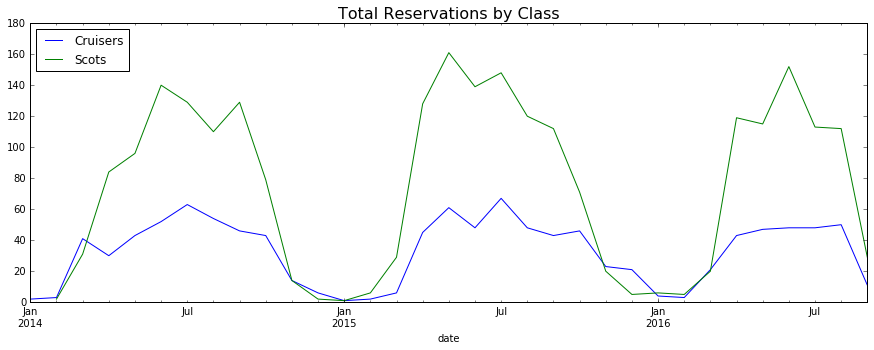

In [18]:
fig = pivoted.plot(figsize=(15,5), )
plt.title("Total Reservations by Class", fontsize=16)
plt.show()

In [19]:
# by functions for scots
df2 = res[res['scot']==1].groupby([res['purpose'], res['year'], res['month']])['id'].count()
df2 = pd.DataFrame(df2)
df2 = df2.reset_index()
df2['date'] = pd.to_datetime(df2['year']*100+df2['month'], format='%Y%m')
pivoted = df2.pivot('date', 'purpose', 'id')

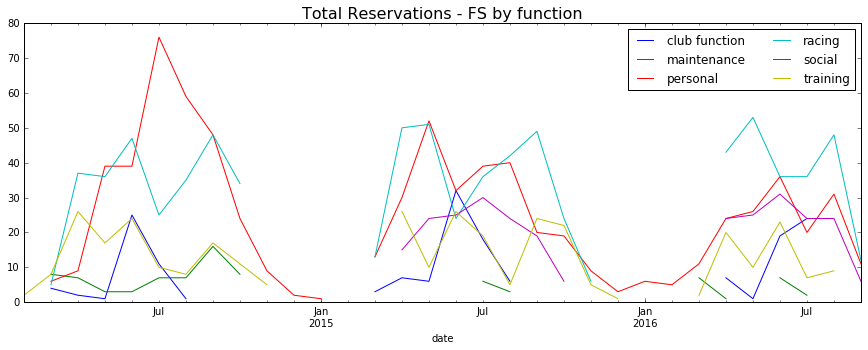

In [20]:
fig = pivoted.plot(figsize=(15,5), legend=True)
plt.title('Total Reservations - FS by function', fontsize=16)
plt.legend(ncol=2)
plt.show()

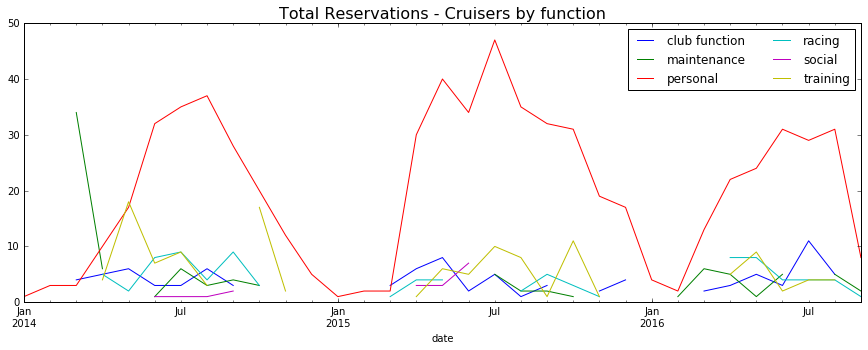

In [21]:
# cruisers
df2 = res[res['scot']==0].groupby([res['purpose'], res['year'], res['month']])['id'].count()
df2 = pd.DataFrame(df2)
df2 = df2.reset_index()
df2['date'] = pd.to_datetime(df2['year']*100+df2['month'], format='%Y%m')
pivoted = df2.pivot('date', 'purpose', 'id')
fig = pivoted.plot(figsize=(15,5), legend=True)
plt.title('Total Reservations - Cruisers by function', fontsize=16)
plt.legend(ncol=2)
plt.show()

## Most Popular Days to be out on the Water


In [22]:
weekday_map= {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu',4:'Fri', 5:'Sat', 6:'Sun'}

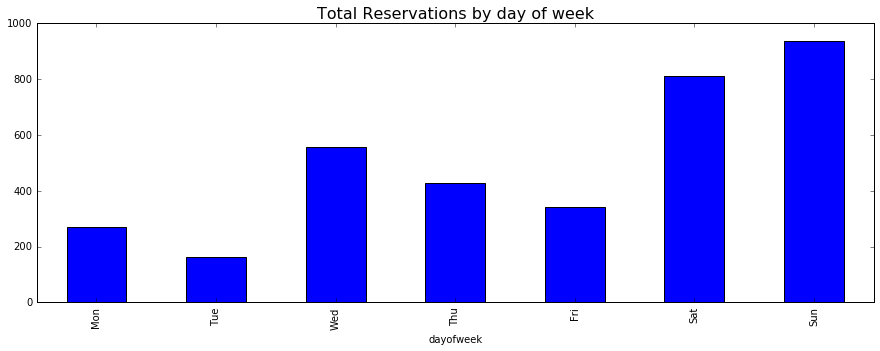

In [23]:
# Total reservations by day of week
ax = res.groupby('dayofweek')['id'].count().plot(kind='bar', figsize=(15,5))
ax.set_xticklabels([weekday_map[d] for d in res.groupby('dayofweek')['id'].count().index])
plt.title('Total Reservations by day of week', fontsize=16)
plt.show()

In [24]:
# for cruisers and scots
df = res.groupby(['scot','dayofweek'])['id'].count()
df = pd.DataFrame(df)
df = df.reset_index()
pivoted = df.pivot('dayofweek', 'scot', 'id')
pivoted.columns = ['Cruisers', 'Scots']

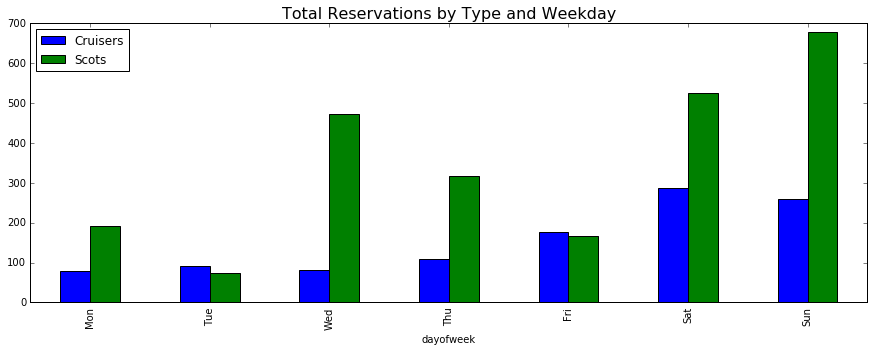

In [25]:
ax = pivoted.plot(kind='bar', figsize=(15,5))
ax.set_xticklabels([weekday_map[d] for d in pivoted.index])
plt.title('Total Reservations by Type and Weekday', fontsize=16)
plt.show()

In [26]:
# by club funcions for scots
df = res[(res['scot']==1)].groupby(['purpose','dayofweek'])['id'].count()
df = pd.DataFrame(df)
df = df.reset_index()
pivoted = df.pivot('dayofweek', 'purpose', 'id')

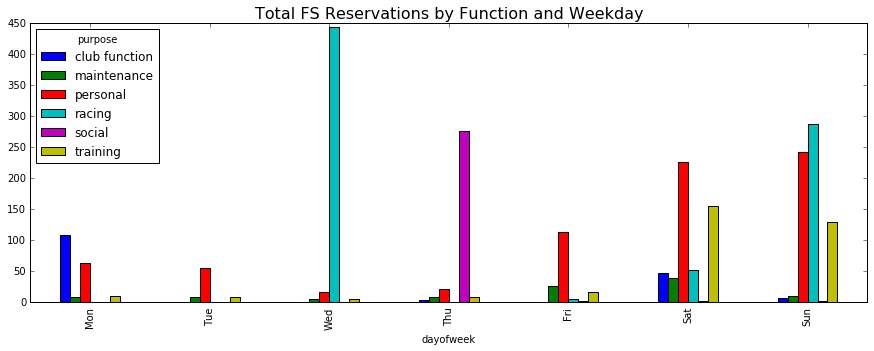

In [27]:
ax = pivoted.plot(kind='bar', figsize=(15,5))
ax.set_xticklabels([weekday_map[d] for d in pivoted.index])
plt.title("Total FS Reservations by Function and Weekday", fontsize=16)
plt.show()

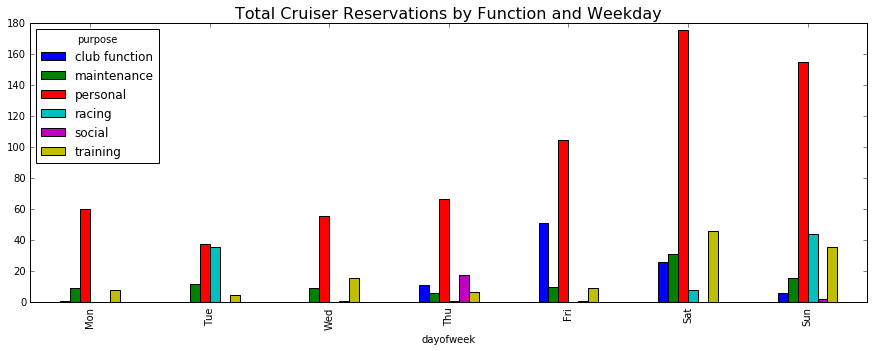

In [28]:
df = res[res['scot']==0].groupby(['purpose','dayofweek'])['id'].count()
df = pd.DataFrame(df)
df = df.reset_index()
pivoted = df.pivot('dayofweek', 'purpose', 'id')
ax = pivoted.plot(kind='bar', figsize=(15,5))
ax.set_xticklabels([weekday_map[d] for d in pivoted.index])
plt.title("Total Cruiser Reservations by Function and Weekday", fontsize=16)
plt.show()

## When are people typically sailing? (Weekday and Reservation Period)

In [29]:
# for scots
df = res[res['scot']==1].groupby(['dayofweek', 'resperiod'])['id'].count()
df = pd.DataFrame(df)
df = df.reset_index()
pivoted = df.pivot('resperiod', 'dayofweek', 'id')

pivoted['Total'] = pivoted.sum(axis=1)
pivoted = pivoted.append(pivoted.sum(), ignore_index=True)

pivoted = pivoted.reset_index()

pivoted.columns = ['Period', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'Total']

pivoted['Period'].ix[1] = '8am-Noon'
pivoted['Period'].ix[2] = 'Noon-4pm'
pivoted['Period'].ix[3] = '4pm-Dusk'
pivoted['Period'].ix[4] = 'Total'

/home/areias/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [30]:
# Total reservation counts per period/day
pivoted.ix[1:,:]

,Period,Mon,Tue,Wed,Thu,Fri,Sat,Sun,Total
1,8am-Noon,16.0,15.0,12.0,8.0,27.0,280.0,176.0,534.0
2,Noon-4pm,31.0,10.0,14.0,19.0,40.0,139.0,238.0,491.0
3,4pm-Dusk,144.0,48.0,448.0,291.0,99.0,105.0,257.0,1392.0
4,Total,191.0,73.0,474.0,318.0,167.0,526.0,678.0,2427.0


In [31]:
percents = pivoted.ix[:,1:].apply(lambda x: x /1966 *100)
format = lambda x: "{0:.0f}".format(x) #Alternatively, format = lambda x: '%.2f' % x
percents = percents.applymap(format)
percents['Period'] = pivoted.ix[:,:1]
percents = percents[ ['Period', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'Total']]

In [32]:
# % reservation by period/day
percents.ix[1:,:]

,Period,Mon,Tue,Wed,Thu,Fri,Sat,Sun,Total
1,8am-Noon,1,1,1,0,1,14,9,27
2,Noon-4pm,2,1,1,1,2,7,12,25
3,4pm-Dusk,7,2,23,15,5,5,13,71
4,Total,10,4,24,16,8,27,34,123


In [33]:
# only cruisers
df = res[res['scot']==0].groupby(['dayofweek', 'resperiod'])['id'].count()
df = pd.DataFrame(df)
df = df.reset_index()
pivoted = df.pivot('resperiod', 'dayofweek', 'id')
pivoted['Total'] = pivoted.sum(axis=1)
pivoted = pivoted.append(pivoted.sum(), ignore_index=True)
pivoted = pivoted.reset_index()
pivoted.columns = ['Period', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'Total']
pivoted['Period'].ix[1] = '8am-Noon'
pivoted['Period'].ix[2] = 'Noon-4pm'
pivoted['Period'].ix[3] = '4pm-Dusk'
pivoted['Period'].ix[4] = 'Total'

In [34]:
pivoted.ix[1:,:]

,Period,Mon,Tue,Wed,Thu,Fri,Sat,Sun,Total
1,8am-Noon,17,16,10,9,32,138,111,333
2,Noon-4pm,6,4,3,7,12,35,69,136
3,4pm-Dusk,52,68,66,91,128,104,72,581
4,Total,78,91,82,110,176,287,259,1083


In [35]:
percents = pivoted.ix[:,1:].apply(lambda x: x /830 *100)
format = lambda x: "{0:.0f}".format(x) #Alternatively, format = lambda x: '%.2f' % x
percents = percents.applymap(format)
percents['Period'] = pivoted.ix[:,:1]
percents = percents[ ['Period', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'Total']]
percents.ix[1:,:]

,Period,Mon,Tue,Wed,Thu,Fri,Sat,Sun,Total
1,8am-Noon,2,2,1,1,4,17,13,40
2,Noon-4pm,1,0,0,1,1,4,8,16
3,4pm-Dusk,6,8,8,11,15,13,9,70
4,Total,9,11,10,13,21,35,31,130


## Boat Popularity Over Time

In [36]:
# again throwing out months past august to compare year on year totals
res = res[res['month']<=8]

In [37]:
df = res.groupby(['name', 'year'])['id'].count()
df = pd.DataFrame(df)
df = df.reset_index()
df['year'] = pd.to_datetime(df['year'], format="%Y")
pivoted = df.pivot('year', 'name', 'id')

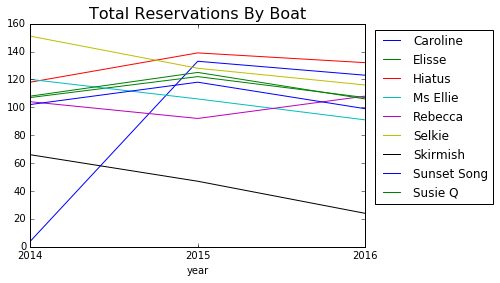

In [38]:
# Boat popularity over time
fig = pivoted.plot()
plt.title('Total Reservations By Boat', fontsize=16)
plt.legend(ncol=1,bbox_to_anchor=(1.4, 1))
plt.show()

## Which boats are most competitive?

SCOW member's preferred racing boats.

In [39]:
# only racing 
df = res[res['purpose']=='racing'].groupby(['name', 'year'])['id'].count()
df = pd.DataFrame(df)
df = df.reset_index()
df['year'] = pd.to_datetime(df['year'], format="%Y")
pivoted = df.pivot('year', 'name', 'id')

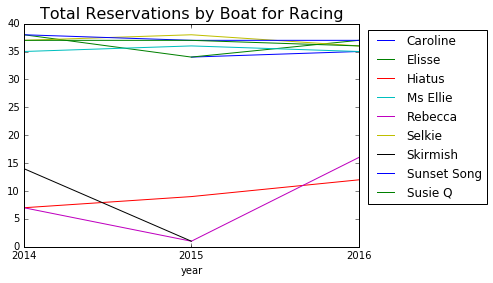

In [40]:
fig = pivoted.plot()
plt.legend(ncol=1,bbox_to_anchor=(1.4, 1))
plt.title('Total Reservations by Boat for Racing', fontsize=16)
plt.show()

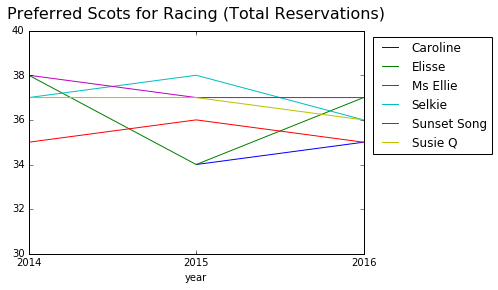

In [41]:
# only scots 
pivoted[list(pivoted.columns.difference(['Hiatus', 'Rebecca', 'Skirmish']))].plot(ylim=[30,40])
plt.legend(ncol=1,bbox_to_anchor=(1.4, 1))
plt.title('Preferred Scots for Racing (Total Reservations)', fontsize=16, y=1.03)
plt.show()

In [42]:
import warnings
warnings.filterwarnings("ignore")

## Are we running out of boats? (Capacity Utilization Rate)

Utilization rate is the percentage of possible reservations actually made. In any given day, the potential number of reservations for Flying Scots is 18 (6 boats * 3 reservation periods).

In [95]:
# reloading reservation data so as to have all months back
res = pd.DataFrame.from_csv('../data_clean/reg_20160907.csv')

# formating date field
res['date'] = pd.to_datetime(res['date'], format="%Y-%m-%d %H:%M:%S")

# for scots
daily = res[res['scot']==1].groupby(['date'])['id'].count()
daily = daily.reset_index()
daily = daily.sort_values('date')

date_index = pd.date_range(daily['date'].min(), daily['date'].max(), freq='D')
daily = daily.set_index('date')
daily = daily.reindex(date_index, fill_value=0)

daily['potential'] = 18

monthly = daily.resample('M').sum()
monthly['rate'] = monthly['id'] / monthly['potential'] *100.


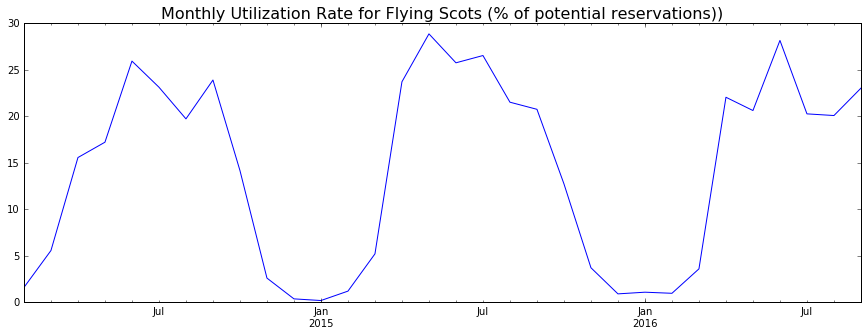

In [96]:
monthly['rate'].plot(figsize=(15,5))
plt.title('Monthly Utilization Rate for Flying Scots (% of potential reservations))', fontsize=16)
plt.show()

### By weekday and reservation period

In [97]:
daily['dayofweek'] = daily.index.dayofweek
weekday = daily.groupby([daily.index.month, 'dayofweek']).sum()
weekday['rate'] = weekday['id'] / weekday['potential'] *100.
weekday = weekday.reset_index()
pivoted = weekday.pivot('level_0', 'dayofweek', 'rate')

In [98]:
pivoted.index.rename('Month', inplace=True)

In [99]:
pivoted.columns = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
my_xticks = ['Jan','Fev','Mar','Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

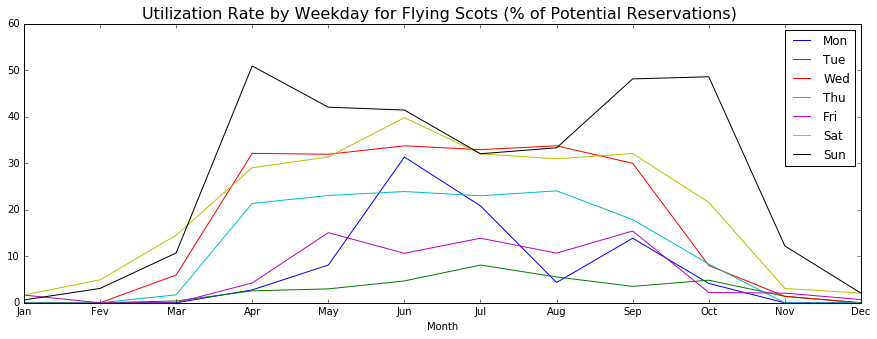

In [100]:
ax = pivoted.plot(figsize=(15,5))
plt.xticks(pivoted.index, my_xticks)
plt.title("Utilization Rate by Weekday for Flying Scots (% of Potential Reservations) " , fontsize=16)
plt.show()

In [101]:
df = res[res['scot']==1].groupby(['date', 'resperiod'])['id'].count()
df = df.reset_index()
df = df.pivot('date', 'resperiod', 'id')

date_index = pd.date_range(df.index.min(), df.index.max(), freq='D')
df = df.reindex(date_index, fill_value=0)
df = df.fillna(0)

df['potential'] = 6
df = df.resample('M').sum()
rate = df.ix[:,:4].apply(lambda x: x *100 / df['potential'])

In [102]:
rate.columns = ['Other', '8am-Noon', 'Noon-4pm', '4pm-Dusk']

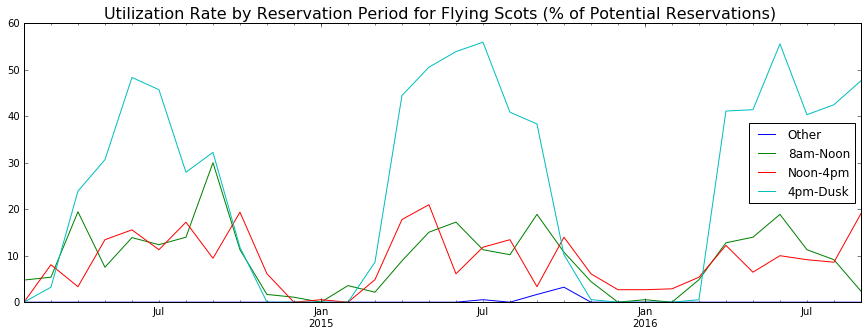

In [103]:
rate.plot(figsize=(15,5))
plt.title("Utilization Rate by Reservation Period for Flying Scots (% of Potential Reservations) " , fontsize=16)
plt.show()

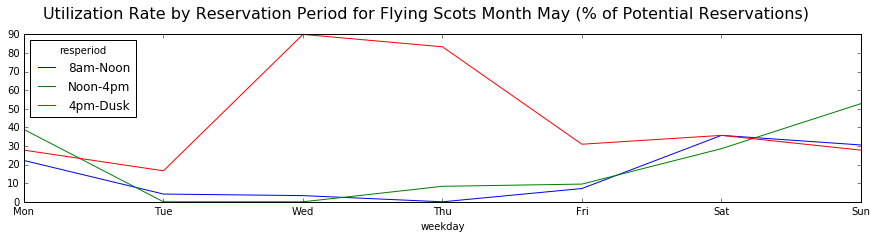

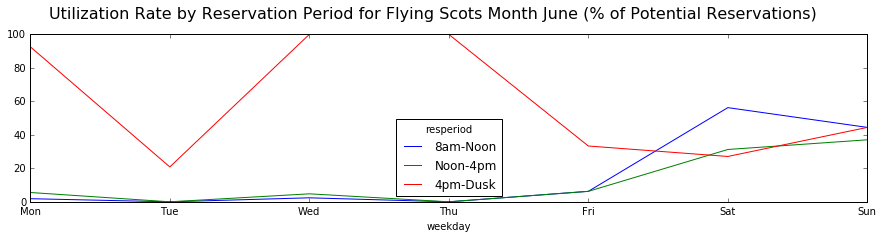

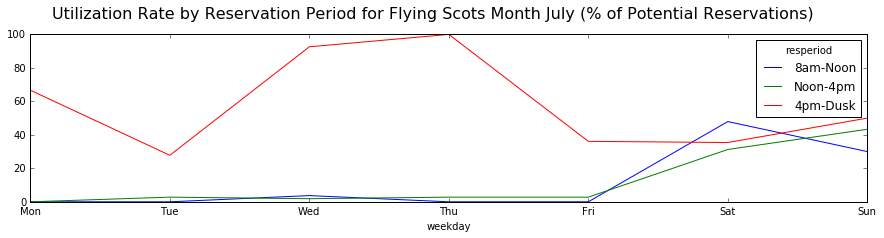

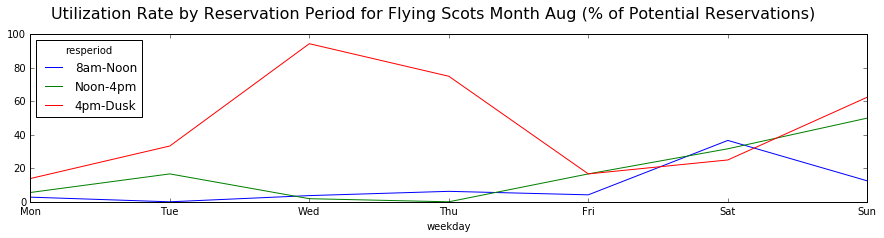

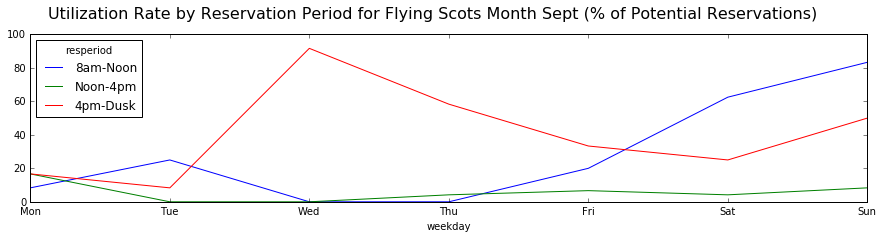

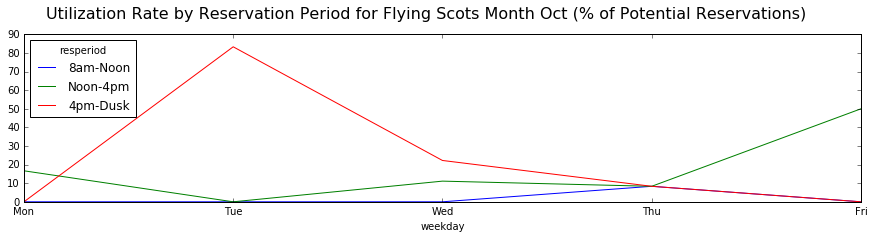

In [185]:
months = ['May', 'June', 'July', 'Aug', 'Sept', 'Oct']
month = 0
   
for i in [5,6,7,8,9,10]:

    df = res[(res['scot']==1) & (res['date'].apply(lambda x: (x.month==i)))] 
    df = df.groupby(['date','resperiod'])['id'].count()
    df = df.reset_index()
    df = df.pivot('date','resperiod','id')
    df = df.fillna(0)
    rates = df.apply(lambda x: x*100/6)
    rates = rates.reset_index()
    rates['weekday'] = rates['date'].apply(lambda x: x.dayofweek)
    rates = rates.groupby('weekday').mean()
    
    rates.rename(columns = {'weekday': 'weekday', 0:'Other', 1: '8am-Noon', 2:'Noon-4pm', 3:'4pm-Dusk'}, inplace=True)

    if 'Other' in rates.columns:
        rates = rates[['8am-Noon', u'Noon-4pm', u'4pm-Dusk']]

    rates.ix[:,:].plot(figsize=(15,3))
    my_xticks = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    plt.xticks(rates.index, my_xticks)
    title_string = "Utilization Rate by Reservation Period for Flying Scots Month " + months[month] + " (% of Potential Reservations) "
    plt.suptitle(title_string , y=1.03, fontsize=16)
    month = month +1
    plt.show()

###  Taking into accounts optimal sailing conditions 
Not all days are equally 'sailable', which affects how many reservations are actually made. What about days when sailing conditions are perfect?

Using NOAA daily weather data for the Reagan Airport Sensor for 2014-01-01 to 2016-08-20. 

Of 963 days, only 26% deemed sailable. Sailable day defined as:
* Average Wind speeds (AVWND) => 5 MPH  and 2-Minute Gusts (WSF2) =<23 MPH
* Temperature (TMAX) =< 95 and (TMIN) >= 55
* Precipitation (PRCP) <= 0.3 (equivalent to 1 hour heavy rain)
* No snow (SNOW)


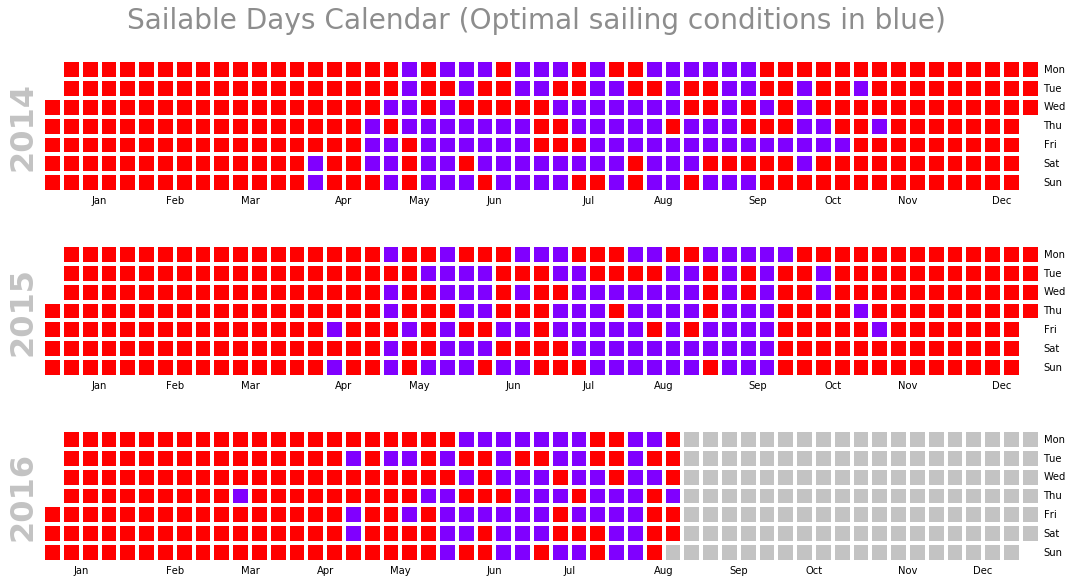

In [115]:
sail = pd.DataFrame.from_csv('../data_clean/sail.csv')
fig,ax = calmap.calendarplot(sail['sail'], linewidth=3,  cmap='rainbow_r', fillcolor='#c3c3c3', fig_kws=dict(figsize=(15, 8)))
plt.suptitle('Sailable Days Calendar (Optimal sailing conditions in blue)', fontsize=28, color='#8d8d8d', y=1.03)
plt.show()

In [116]:
# merging sailing dummy with reservation data
sail = sail.reset_index()
sail = sail[['DATE', 'sail']]
sail.columns = ['date', 'sail']
sail['date'] = pd.to_datetime(sail['date'], format='%Y-%m-%d')
res = pd.merge(res,sail,on='date')

In [118]:
df = res[(res['sail']==1) & (res['scot']==1)]
df = df.groupby(['date','resperiod'])['id'].count()
df = df.reset_index()
df = df.pivot('date','resperiod','id')
df = df.fillna(0)
rates = df.apply(lambda x: x*100/6)
rates = rates.reset_index()
rates['weekday'] = rates['date'].apply(lambda x: x.dayofweek)
rates = rates.groupby('weekday').mean()

In [119]:
rates = rates.reset_index()

In [120]:
rates.rename(columns = {'weekday': 'weekday', 0:'Other', 1: '8am-Noon', 2:'Noon-4pm', 3:'4pm-Dusk'}, inplace=True)

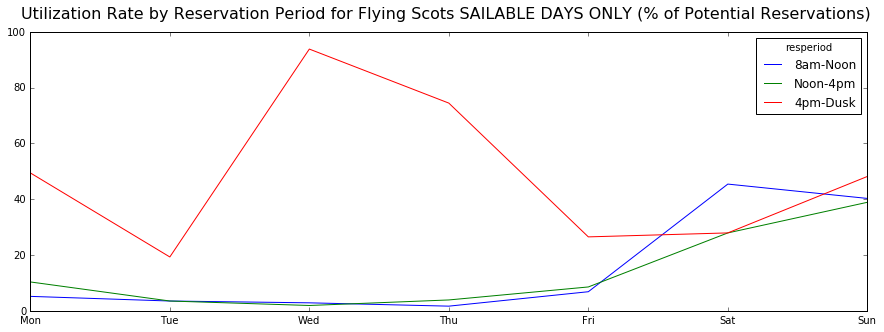

In [123]:
rates.ix[:,2:].plot(figsize=(15,5))
my_xticks = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.xticks(rates.index, my_xticks)
plt.title("Utilization Rate by Reservation Period for Flying Scots SAILABLE DAYS ONLY (% of Potential Reservations) " , y=1.03, fontsize=16)
plt.show()